<h1 style="color:blue">Simulation Project</h1>
<h1>Mohammad Saeed Zare Mehrjardi</h1>
<h1>Zahra Sadat Esmati Baygi</h1>

In [1]:
!pip install networkx
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pandas

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import pandas as pd
import graph as gr
import seaborn as sns
from collections import Counter

In [3]:
sys.setrecursionlimit(10000)

# we want to model some graphs
* Stationary model
* Monte-Carlo : to calculate the available parameters in some types of graphs (simulate 100 to 1000 times for accept or reject a soluiton)
* It is not dependent on time

# Create ER Sample graph

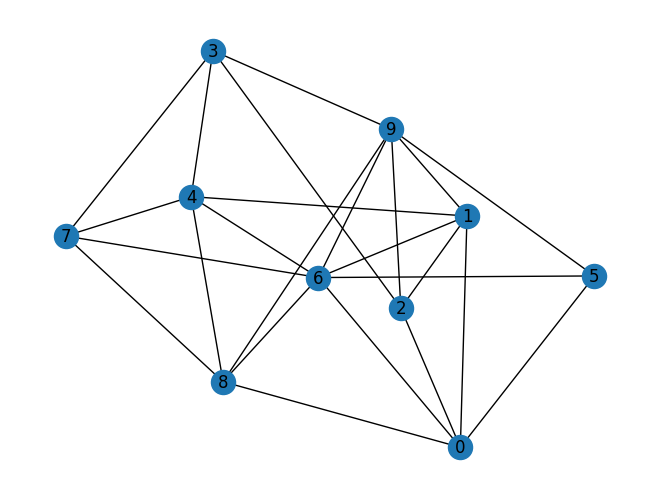

In [4]:
# create er graph (also known as an Erdős-Rényi graph or a binomial graph)
n = 10  # Number of nodes
p = 0.5   # Probability of an edge between any two nodes

er_graph = nx.gnp_random_graph(n, p)

nx.draw(er_graph, with_labels=True)
plt.show()

In [5]:
er_degree_df = pd.DataFrame({"node":er_graph.nodes(),"degree_of_node":list(d for n, d in er_graph.degree())})
er_degree_df

,node,degree_of_node
0,0,5
1,1,5
2,2,4
3,3,4
4,4,5
5,5,3
6,6,7
7,7,4
8,8,5
9,9,6


mean 4.65


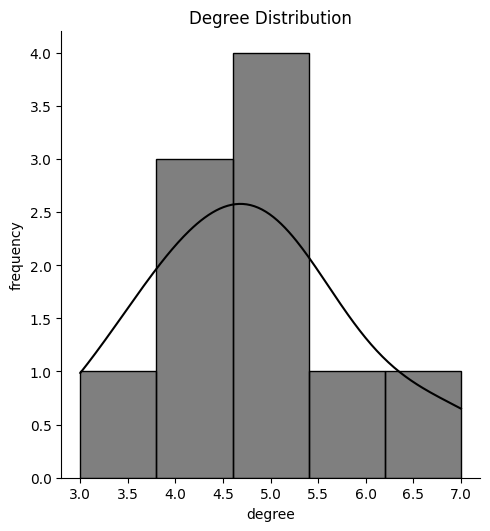

In [6]:
   
gr.draw_degree_distribution(er_graph)
print(f"mean {np.average(er_graph.degree)}")

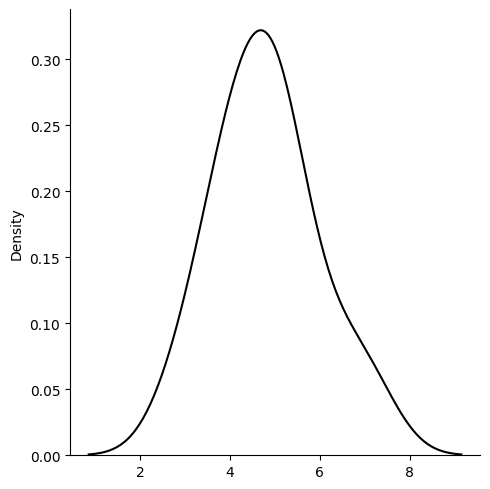

In [7]:
degrees = [d for n, d in er_graph.degree()]
sns.displot(degrees, kind="kde", color="black")

# Create SF Sample graph

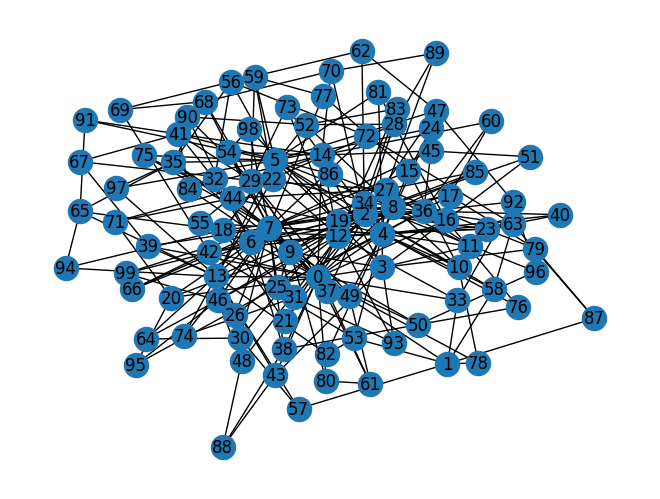

In [8]:
n = 100
m = 3
sf_graphs = []

sf_graph = nx.barabasi_albert_graph(n, m)

nx.draw(sf_graph, with_labels=True)
plt.show()

In [9]:
sf_degree_df = pd.DataFrame({"node":sf_graph.nodes(),"degree_of_node":list(d for n, d in sf_graph.degree())})
sf_degree_df

,node,degree_of_node
0,0,26
1,1,7
2,2,21
3,3,10
4,4,26
...,...,...
95,95,3
96,96,3
97,97,3
98,98,3


mean 27.66


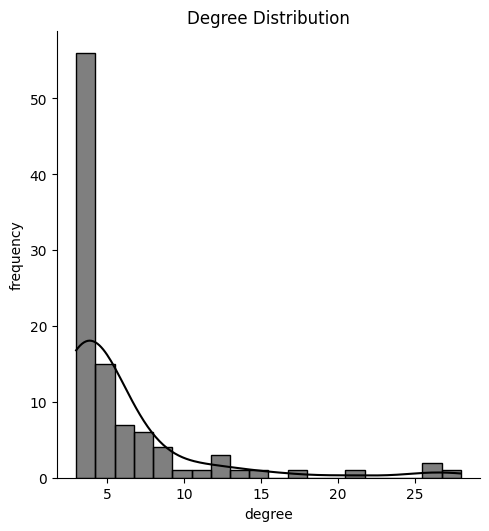

In [10]:
gr.draw_degree_distribution(sf_graph)
print(f"mean {np.average(sf_graph.degree)}")

(3.0, 60.0)

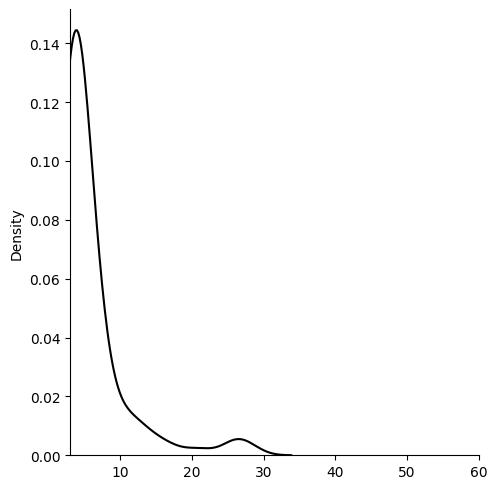

In [41]:
# power low distribtion
degrees = [d for n, d in sf_graph.degree()]
sns.displot(degrees, kind="kde", color="black")
plt.xlim(min(degrees), 60)

# Create Watts strogatz Sample Graph

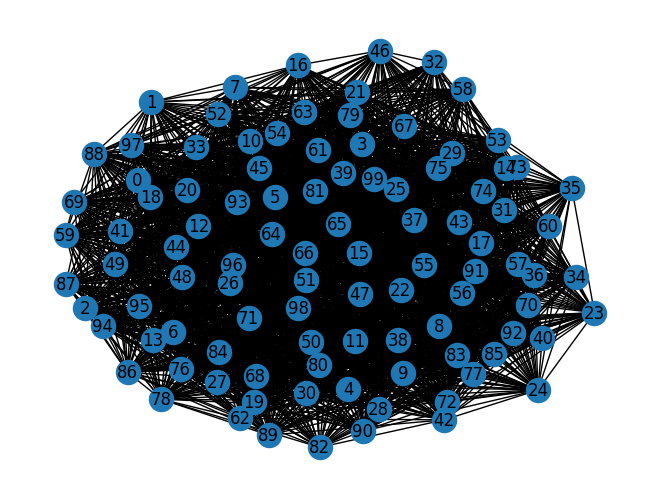

In [12]:
n = 100
k = 50
p = 0.5

wa_graph = nx.watts_strogatz_graph(n, k, p)

nx.draw(wa_graph, with_labels=True)
plt.show()

mean 49.75


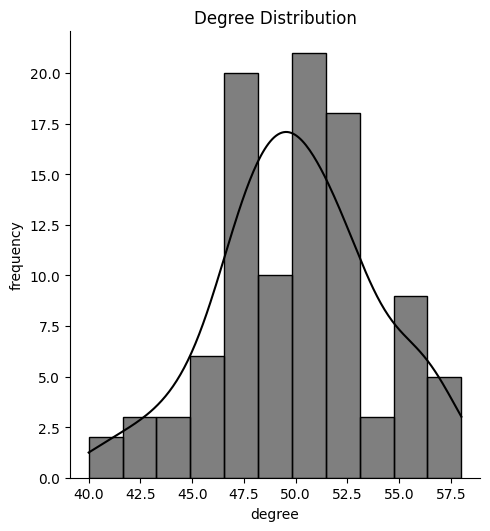

In [13]:
gr.draw_degree_distribution(wa_graph)
print(f"mean {np.average(wa_graph.degree)}")

(40.0, 60.0)

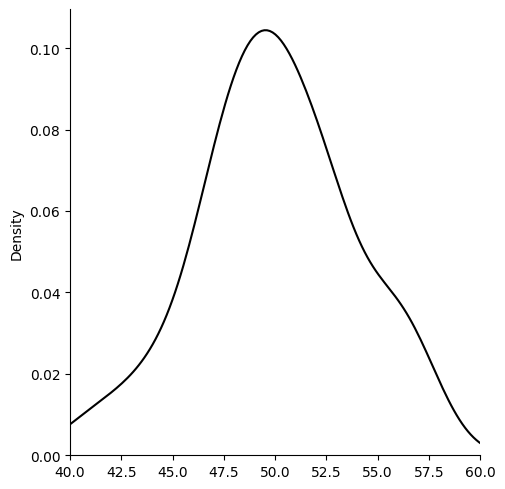

In [38]:
degrees = [d for n, d in wa_graph.degree()]
sns.displot(degrees, kind="kde", color="black")
plt.xlim(min(degrees), 60)

In [14]:
wa_degree_df = pd.DataFrame({"node":wa_graph.nodes(),"degree_of_node":list(d for n, d in wa_graph.degree())})
wa_degree_df

,node,degree_of_node
0,0,53
1,1,44
2,2,51
3,3,48
4,4,48
...,...,...
95,95,48
96,96,54
97,97,44
98,98,50


# Create Dataset For ER, SF, WA Graphs

In [15]:
# crate 100 ER graph with size between 100 to 1000
number_of_simulation = 100
p = 0.15
er_degree_mean = 0
er_graphs = [] # ER graph dataset
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    er = nx.gnp_random_graph(n, p)
    
    er_degree_mean += sum(list(d for n, d in er.degree())) / n  
    er_graphs.append(er)
    
er_degree_mean /= number_of_simulation    

In [16]:
# crate 100 SF graph with size between 100 to 1000
number_of_simulation = 100
m = 50
sf_graphs = [] # sr graph dataset
sf_degree_mean = 0
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    sf = nx.barabasi_albert_graph(n, m)
    
    sf_degree_mean += sum(list(d for n, d in sf.degree())) / n  
    sf_graphs.append(sf)
    
sf_degree_mean /= number_of_simulation    

In [17]:
# crate 100 watts strogatz graph with size between 100 to 1000
number_of_simulation = 100
k = 85
p = 0.5
wa_graphs = [] # watts strogatz graph dataset
wa_degree_mean = 0
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    wa = nx.watts_strogatz_graph(n, k, p)
    
    wa_degree_mean += sum(list(d for n, d in wa.degree())) / n  
    wa_graphs.append(wa)
    
wa_degree_mean /= number_of_simulation    

In [18]:
df = pd.DataFrame({"degree":[er_degree_mean, sf_degree_mean, wa_degree_mean]}, index=['ER', 'SF', 'WA'])
df

,degree
ER,85.847176
SF,86.474862
WA,84.000000


# compare ER, SF, Watts-Strogatz Algebratic Connectivity
### ER > SF > Watts-Strogatz

In [19]:
number_of_simulation = 10
sf_algebraic_connectivity = []
er_algebraic_connectivity = []
wa_algebraic_connectivity = []

for i in range(number_of_simulation):
    sf_algebraic_connectivity.append(gr.algebraic_connectivity(sf_graphs[i]))
    er_algebraic_connectivity.append(gr.algebraic_connectivity(er_graphs[i]))
    wa_algebraic_connectivity.append(gr.algebraic_connectivity(wa_graphs[i]))

print(f"er algebratic connectivity {np.mean(er_algebraic_connectivity)}")
print(f"sf algebratic connectivity {np.mean(sf_algebraic_connectivity)}")
print(f"watts strogatz algebratic connectivity {np.mean(wa_algebraic_connectivity)}")


er algebratic connectivity 52.72758786833
sf algebratic connectivity 40.41439637257
watts strogatz algebratic connectivity 47.910236113459995


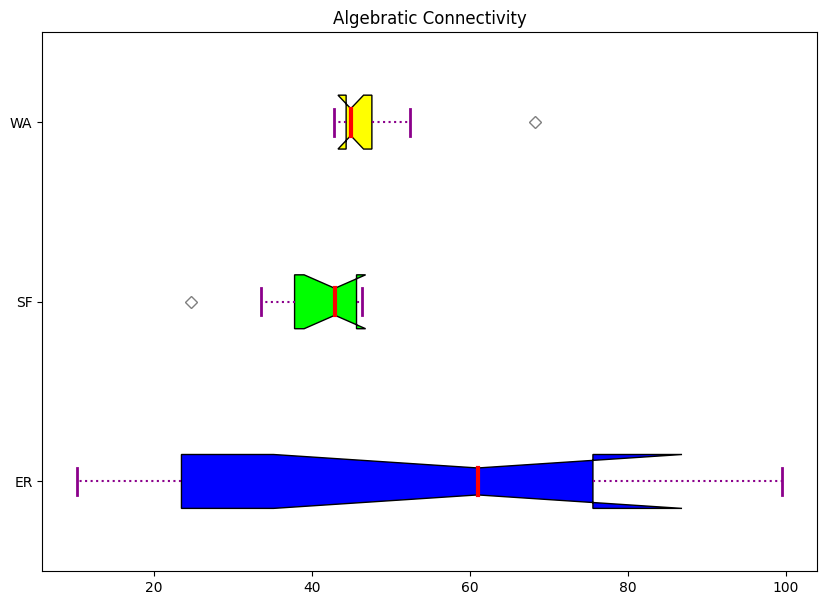

In [20]:
gr.box_plot([er_algebraic_connectivity, sf_algebraic_connectivity, wa_algebraic_connectivity], ['ER', 'SF', 'WA'], 'Algebratic Connectivity')

# compare ER, SF, Watts-Strogatz Spectral Gap

### ER > SF > Watts-Strogatz

In [21]:
number_of_simulation = 10
sf_spectral_gap = []
er_spectral_gap = []
wa_spectral_gap = []

for i in range(number_of_simulation):
    sf_spectral_gap.append(gr.spectral_gap(sf_graphs[i]))
    er_spectral_gap.append(gr.spectral_gap(er_graphs[i]))
    wa_spectral_gap.append(gr.spectral_gap(wa_graphs[i]))

print(f"er spectral gap {np.mean(er_spectral_gap)}")
print(f"sf spectral gap {np.mean(sf_spectral_gap)}")
print(f"watts strogatz spectral gap {np.mean(wa_spectral_gap)}")

er spectral gap 63.69652859903
sf spectral gap 91.59420005419
watts strogatz spectral gap 49.140275936980004


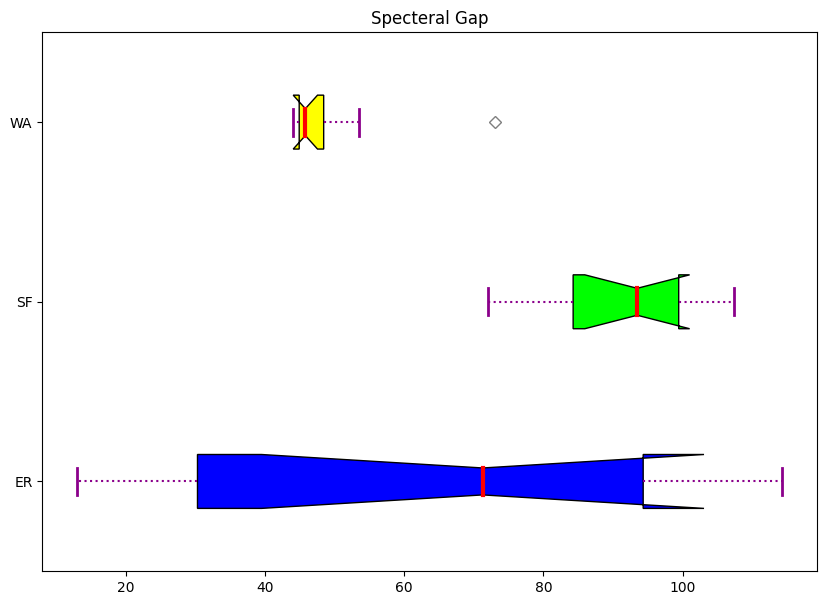

In [22]:
gr.box_plot([er_spectral_gap, sf_spectral_gap, wa_spectral_gap], ['ER', 'SF', 'WA'], 'Specteral Gap')

# compare ER, SF, Watts-Strogatz Natural Connectivity

ER > SF > Watts-Strogatz

In [23]:
number_of_simulation = 10
sf_natural_connectivity = []
er_natural_connectivity = []
wa_natural_connectivity = []

for i in range(number_of_simulation):
    sf_natural_connectivity.append(gr.natural_connectivity(sf_graphs[i]))
    er_natural_connectivity.append(gr.natural_connectivity(er_graphs[i]))
    wa_natural_connectivity.append(gr.natural_connectivity(wa_graphs[i]))

print(f"er natural connectivity {np.mean(er_natural_connectivity)}")
print(f"sf natural connectivity {np.mean(sf_natural_connectivity)}")
print(f"watts strogatz natural connectivity {np.mean(wa_natural_connectivity)}")

er natural connectivity 72.89732575280001
sf natural connectivity 101.28443555217
watts strogatz natural connectivity 78.03147630963001


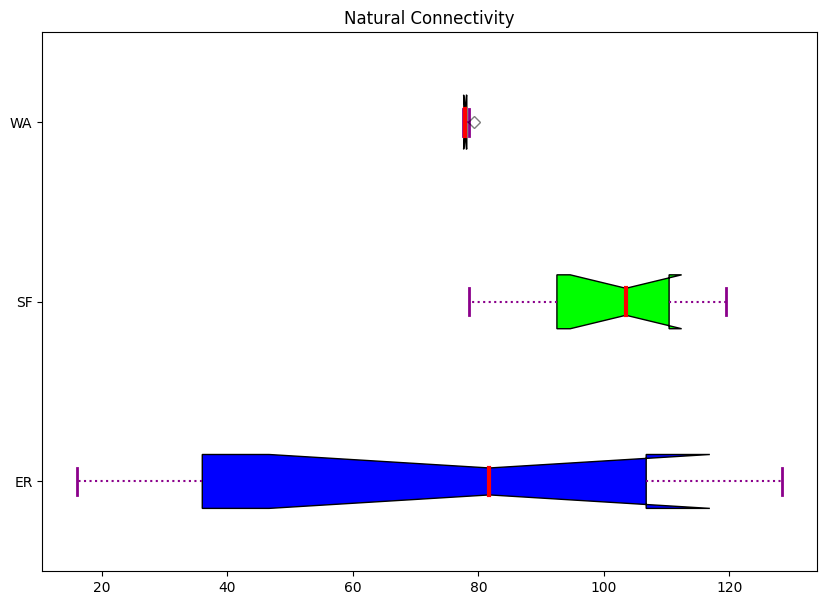

In [24]:
gr.box_plot([er_natural_connectivity, sf_natural_connectivity, wa_natural_connectivity], ['ER', 'SF', 'WA'], 'Natural Connectivity')

# compare ER, SF, Watts-Strogatz Energy Connectivity

In [25]:
number_of_simulation = 10
sf_energy = []
er_energy = []
wa_energy = []

for i in range(number_of_simulation):
    sf_energy.append(gr.energy(sf_graphs[i]))
    er_energy.append(gr.energy(er_graphs[i]))
    wa_energy.append(gr.energy(wa_graphs[i]))

print(f"er energy {np.mean(er_energy)}")
print(f"sf energy {np.mean(sf_energy)}")
print(f"watts strogatz energy {np.mean(wa_energy)}")

er energy 4052.52265974881
sf energy 3375.7264040729206
watts strogatz energy 4339.4083419977


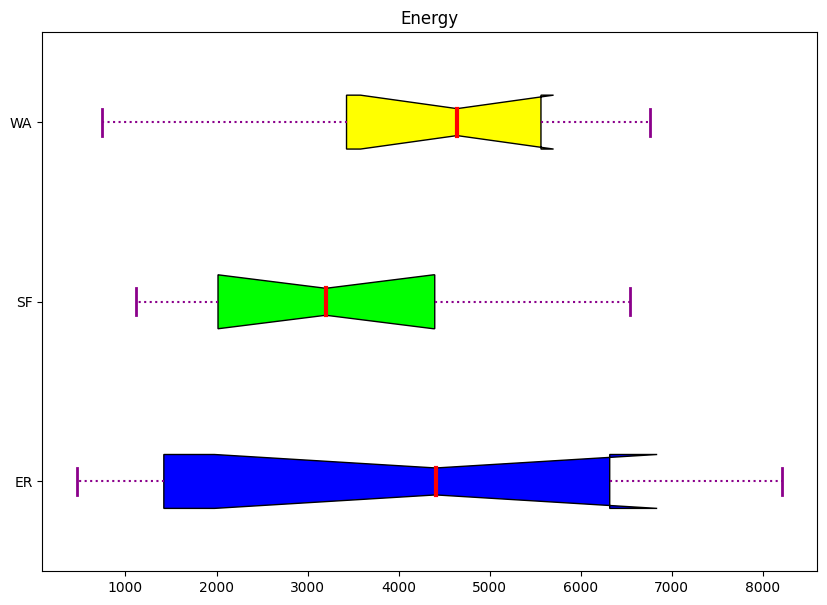

In [26]:
gr.box_plot([er_energy, sf_energy, wa_energy], ['ER', 'SF', 'WA'], 'Energy')

# compare ER, SF, Watts-Strogatz Laplacian Energy Connectivity

In [27]:
number_of_simulation = 10
sf_laplacian_energy = []
er_laplacian_energy = []
wa_laplacian_energy = []

for i in range(number_of_simulation):
    sf_laplacian_energy.append(gr.laplacian_energy(sf_graphs[i]))
    er_laplacian_energy.append(gr.laplacian_energy(er_graphs[i]))
    wa_laplacian_energy.append(gr.laplacian_energy(wa_graphs[i]))

print(f"er laplacian energy {np.mean(er_laplacian_energy)}")
print(f"sf laplacian energy {np.mean(sf_laplacian_energy)}")
print(f"watts laplacian strogatz energy {np.mean(wa_laplacian_energy)}")

er laplacian energy 5658.25050841565
sf laplacian energy 16713.50206906343
watts laplacian strogatz energy 5190.44496490223


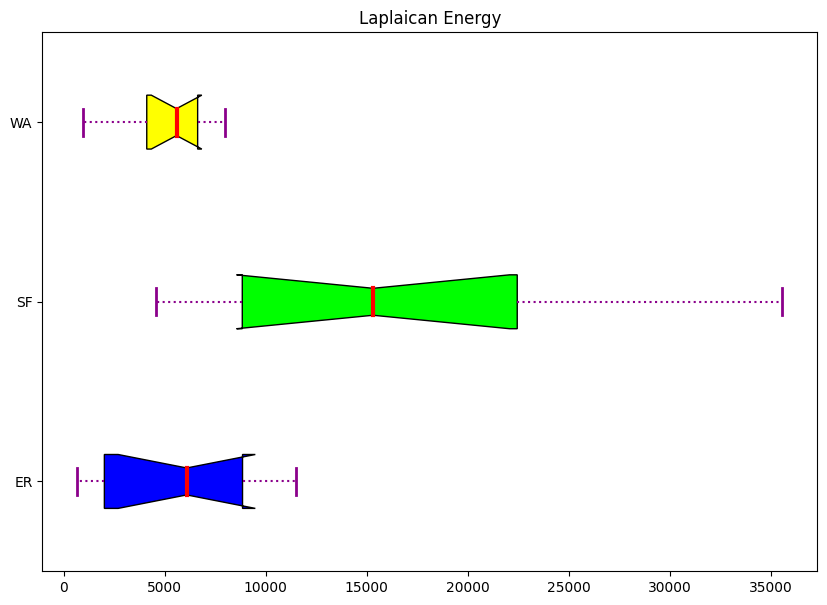

In [28]:
gr.box_plot([er_laplacian_energy, sf_laplacian_energy, wa_laplacian_energy], ['ER', 'SF', 'WA'], 'Laplaican Energy')

mean is 101.28443555217
standard deviation is 12.380274485560989
CI is (93.61106192741134, 108.95780917692865)


(101.28443555217,
 12.380274485560989,
 7.673373624758649,
 (93.61106192741134, 108.95780917692865))

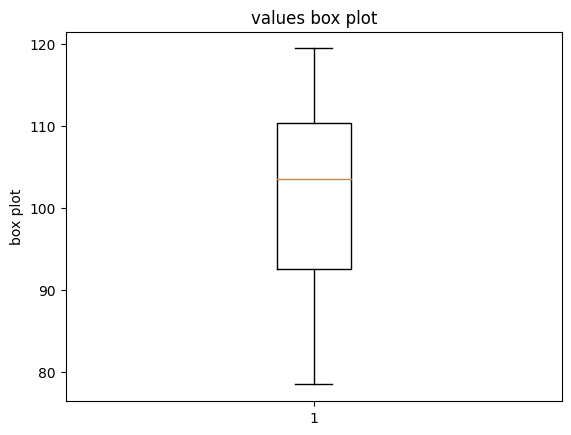

In [44]:
gr.calculate_statistics_parameters(sf_natural_connectivity)

mean is 72.89732575280001
standard deviation is 39.507602584664255
CI is (48.41025997698233, 97.3843915286177)


(72.89732575280001,
 39.507602584664255,
 24.487065775817683,
 (48.41025997698233, 97.3843915286177))

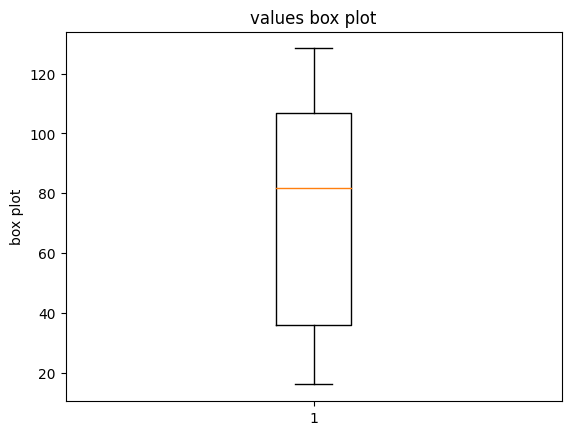

In [30]:
gr.calculate_statistics_parameters(er_natural_connectivity)

mean is 78.03147630963001
standard deviation is 0.536624441364166
CI is (77.69887303499607, 78.36407958426395)


(78.03147630963001,
 0.536624441364166,
 0.33260327463394274,
 (77.69887303499607, 78.36407958426395))

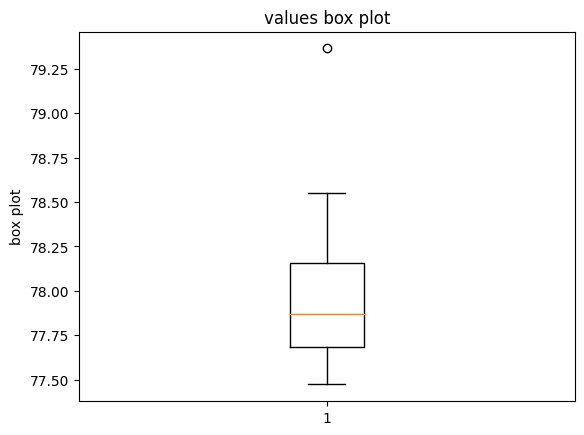

In [31]:
gr.calculate_statistics_parameters(wa_natural_connectivity)

# Conclusion

In [32]:
data = {
    "Algebratic Connectivity": [np.mean(er_algebraic_connectivity), np.mean(sf_algebraic_connectivity), np.mean(wa_algebraic_connectivity)],
    "Natural Connectivity": [np.mean(er_natural_connectivity), np.mean(sf_natural_connectivity), np.mean(wa_natural_connectivity)],
    "Spectral Gap": [np.mean(er_spectral_gap), np.mean(sf_spectral_gap), np.mean(wa_spectral_gap)],
    "Energy": [np.mean(er_energy), np.mean(sf_energy), np.mean(wa_energy)],
    "Laplacian Energy": [np.mean(er_laplacian_energy), np.mean(sf_laplacian_energy), np.mean(wa_laplacian_energy)] 
}

df = pd.DataFrame(data, index = ["ER", "SF", "WA"])

df

,Algebratic Connectivity,Natural Connectivity,Spectral Gap,Energy,Laplacian Energy
ER,52.727588,72.897326,63.696529,4052.522660,5658.250508
SF,40.414396,101.284436,91.594200,3375.726404,16713.502069
WA,47.910236,78.031476,49.140276,4339.408342,5190.444965


# Export Excel

In [45]:
df.to_excel('statistics.xlsx')